In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

In [2]:
# read data
data = pd.read_csv('YaleFace.csv', header=None)

In [3]:
# compute the mean image
mean_img = data.mean(axis=1).to_numpy()

# compute the first 16 principal components
pca = PCA(n_components=16)
pca.fit(data.T)

PCA(n_components=16)

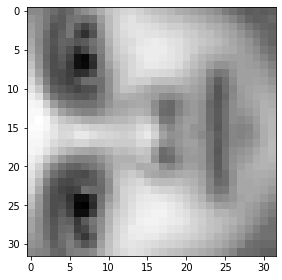

In [4]:
# show the mean image
im = Image.fromarray(mean_img.reshape(32,32).astype(np.uint8), 'L')
plt.imshow(im, cmap='gray')
plt.tight_layout()

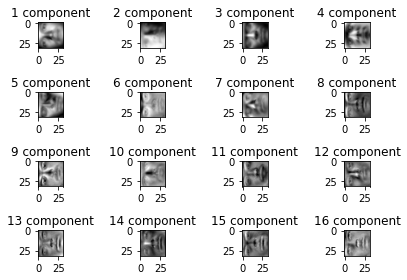

In [5]:
# show the 16 principal component as images
for i in range(1, 17):
    plt.subplot(4, 4, i).set_title(f'{i} component')
    plt.imshow(pca.components_[i-1].reshape(32,32), cmap='gray')
plt.tight_layout()

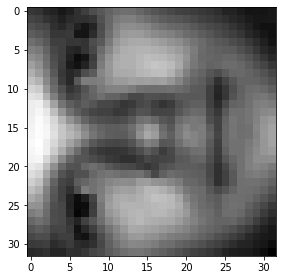

In [6]:
# to approximate the first face image
nComp = 10
first_img = data.iloc[:, :1]
Xhat = np.dot(pca.transform(first_img.T)[:,:nComp], pca.components_[:nComp,:])
Xhat += mean_img

# show the approxiation image
im = Image.fromarray(Xhat.reshape(32,32).astype(np.uint8), 'L')
plt.imshow(im, cmap='gray')
plt.tight_layout()